In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import tensorflow as tf
%matplotlib inline

In [4]:
pwd

'C:\\SPB_Data\\Projects\\bangladesh-weather-dataset'

In [5]:
weather = pd.read_csv(r"C:\SPB_Data\bangladesh-weather-dataset\bangladesh-weather-dataset\datasets\weather\weather.csv")
weather.head()

,tem,Month,Year,rain
0,16.9760,1,1901,18.5356
1,19.9026,2,1901,16.2548
2,24.3158,3,1901,70.7981
3,28.1834,4,1901,66.1616
4,27.8892,5,1901,267.2150


In [6]:
weather.isnull().sum()

tem      0
Month    0
Year     0
rain     0
dtype: int64

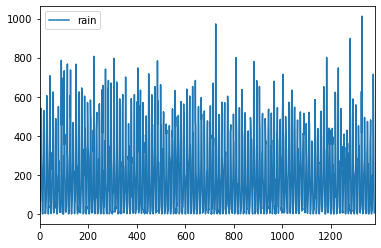

In [7]:
weather[['rain']].plot()

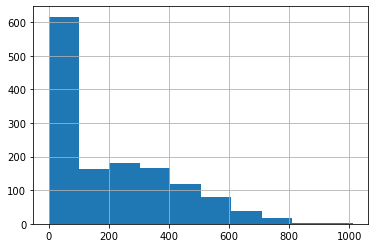

In [8]:
weather.rain.hist()

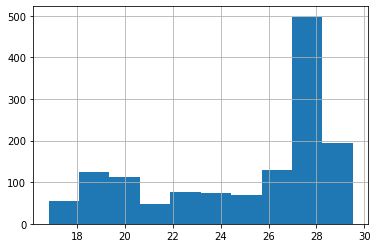

In [9]:
weather.tem.hist()

No handles with labels found to put in legend.


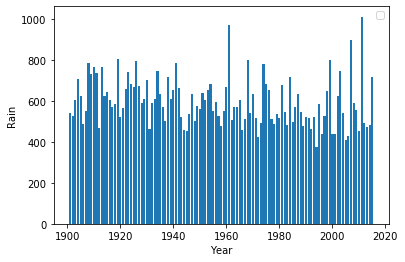

In [10]:
plt.bar(weather['Year'],weather['rain'])
plt.xlabel("Year")
plt.ylabel("Rain")
plt.legend()

No handles with labels found to put in legend.


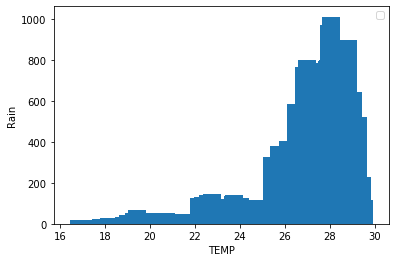

In [11]:
plt.bar(weather['tem'],weather['rain'])
plt.xlabel("TEMP")
plt.ylabel("Rain")
plt.legend()

In [12]:
correlation = weather.corr()

In [13]:
correlation

,tem,Month,Year,rain
tem,1.000000,0.159809,0.051686,0.699846
Month,0.159809,1.000000,0.000000,0.135204
Year,0.051686,0.000000,1.000000,-0.027024
rain,0.699846,0.135204,-0.027024,1.000000


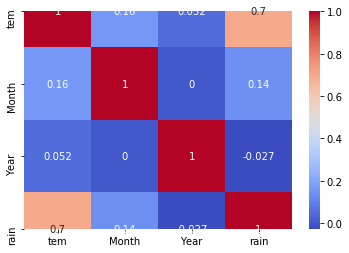

In [14]:
sns.heatmap(correlation,cmap='coolwarm',annot=True)

In [15]:
sns.set(style="whitegrid",color_codes=True)

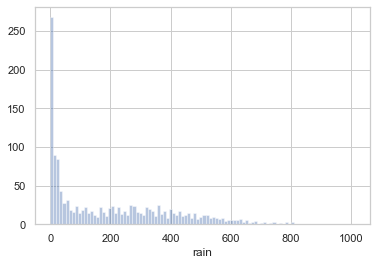

In [16]:
sns.distplot(weather['rain'], kde=False, bins=100);

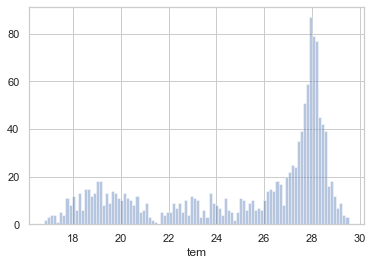

In [17]:
sns.distplot(weather['tem'],kde=False, bins=100);

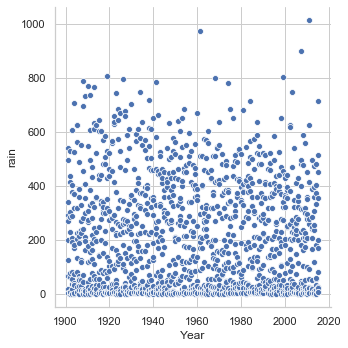

In [18]:
sns.relplot(x="Year", y="rain", data=weather);

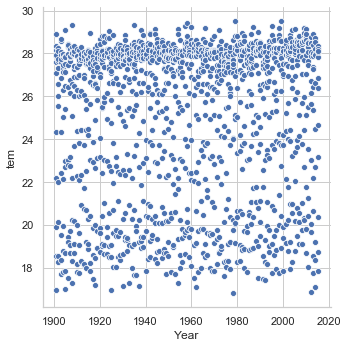

In [19]:
sns.relplot(x="Year", y="tem", data=weather);

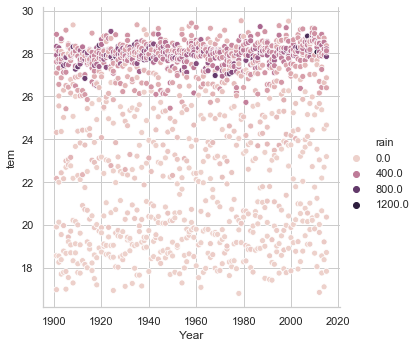

In [20]:
sns.relplot(x="Year", y="tem", hue="rain", data=weather);

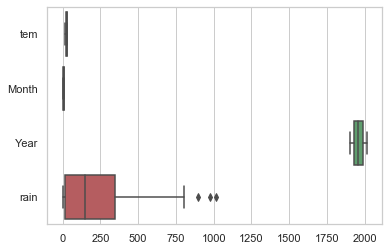

In [21]:
sns.boxplot(data=weather,orient='h')

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [23]:
weather.head()
X = weather.drop('rain',axis=1)
y = weather[['rain']]

In [24]:
X.head()

,tem,Month,Year
0,16.9760,1,1901
1,19.9026,2,1901
2,24.3158,3,1901
3,28.1834,4,1901
4,27.8892,5,1901


In [25]:
y.head()

,rain
0,18.5356
1,16.2548
2,70.7981
3,66.1616
4,267.2150


In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2)
result = y_test
scaler = MinMaxScaler()

scaler.fit(y_train)
y_train =scaler.transform(y_train) 
scaler.fit(y_test)
y_test =scaler.transform(y_test) 

In [27]:
from keras import Sequential
from keras.layers import Dense,Dropout,LSTM,Flatten


Using TensorFlow backend.


In [28]:
print (x_train.shape)
print (x_test.shape)

(1104, 3)
(276, 3)


In [29]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [30]:
x_train

array([[  22.3027,   11.    , 1910.    ],
       [  28.2475,    9.    , 1996.    ],
       [  20.7171,    2.    , 1913.    ],
       ...,
       [  27.9154,    9.    , 1981.    ],
       [  19.4021,   12.    , 2000.    ],
       [  27.8983,    8.    , 1917.    ]])

In [31]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [32]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(1104, 3, 1)
(276, 3, 1)
(1104, 1)
(276, 1)


In [33]:
def RNN_model():
    regressor = Sequential()
    regressor.add(LSTM(units = 50,return_sequences = True))
    regressor.add(Dropout(.2))
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 1)) #we want single feature output which is df['Close']
    regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')
    return regressor

In [34]:
regressor = RNN_model()

Instructions for updating:
Colocations handled automatically by placer.


In [35]:
regressor.fit(x_train,y_train,epochs = 100)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1104/1104 [==============================] - 17s 16ms/step - loss: 0.0426
Epoch 2/100
1104/1104 [==============================] - 1s 991us/step - loss: 0.0324
Epoch 3/100
1104/1104 [==============================] - 1s 826us/step - loss: 0.0241
Epoch 4/100
1104/1104 [==============================] - 1s 479us/step - loss: 0.0204
Epoch 5/100
1104/1104 [==============================] - 1s 486us/step - loss: 0.0194
Epoch 6/100
1104/1104 [==============================] - 1s 1ms/step - loss: 0.0178
Epoch 7/100
1104/1104 [==============================] - 1s 710us/step - loss: 0.0161
Epoch 8/100
1104/1104 [==============================] - 2s 2ms/step - loss: 0.0161
Epoch 9/100
1104/1104 [==============================] - 1s 782us/step - loss: 0.0142
Epoch 10/100
1104/1104 [==============================] - 1s 832us/

1104/1104 [==============================] - 1s 724us/step - loss: 0.0075
Epoch 89/100
1104/1104 [==============================] - 2s 2ms/step - loss: 0.0078
Epoch 90/100
1104/1104 [==============================] - -3596s -3257409us/step - loss: 0.0075
Epoch 91/100
1104/1104 [==============================] - 1s 848us/step - loss: 0.0076
Epoch 92/100
1104/1104 [==============================] - 1s 907us/step - loss: 0.0072
Epoch 93/100
1104/1104 [==============================] - 1s 989us/step - loss: 0.0077
Epoch 94/100
1104/1104 [==============================] - 1s 1ms/step - loss: 0.0077
Epoch 95/100
1104/1104 [==============================] - 1s 524us/step - loss: 0.0085
Epoch 96/100
1104/1104 [==============================] - 1s 501us/step - loss: 0.0077
Epoch 97/100
1104/1104 [==============================] - 1s 544us/step - loss: 0.0073
Epoch 98/100
1104/1104 [==============================] - 1s 811us/step - loss: 0.0077
Epoch 99/100
1104/1104 [===========================

In [36]:
y_pred = regressor.predict(x_test)

In [37]:
y_pred

array([[ 0.42403504],
       [ 0.00756058],
       [ 0.04926196],
       [ 0.41703454],
       [ 0.02718536],
       [ 0.05925092],
       [ 0.47999755],
       [ 0.17938489],
       [ 0.42935866],
       [ 0.4292077 ],
       [ 0.48673108],
       [ 0.38610774],
       [ 0.01738328],
       [ 0.05106445],
       [ 0.059485  ],
       [ 0.02597797],
       [-0.00730196],
       [ 0.02495728],
       [ 0.17682683],
       [ 0.4341973 ],
       [ 0.49494663],
       [-0.00252365],
       [ 0.3860916 ],
       [ 0.0054052 ],
       [ 0.04736469],
       [ 0.17768806],
       [ 0.05033074],
       [ 0.21661188],
       [ 0.07769896],
       [ 0.00967645],
       [ 0.03762207],
       [ 0.4201415 ],
       [ 0.29526734],
       [ 0.4122254 ],
       [ 0.4090307 ],
       [ 0.26839072],
       [ 0.46213815],
       [ 0.20971444],
       [ 0.42743236],
       [ 0.024557  ],
       [ 0.1047771 ],
       [-0.0008917 ],
       [ 0.29125077],
       [ 0.29792342],
       [ 0.03060444],
       [ 0

In [38]:
output = scaler.inverse_transform(y_pred)

In [39]:
real_output = []
for item in output:
    real_output.append((item[0]))

In [40]:
real_output

[429.13522,
 7.657116,
 49.859512,
 422.05063,
 27.517672,
 59.96848,
 485.77008,
 181.54578,
 434.5228,
 434.37006,
 492.5845,
 390.75226,
 17.597826,
 51.68366,
 60.205376,
 26.295776,
 -7.3839846,
 25.262829,
 178.95699,
 439.4196,
 500.89877,
 -2.5482655,
 390.7359,
 5.475842,
 47.93944,
 179.82857,
 50.941124,
 219.22002,
 78.63816,
 9.798405,
 38.079777,
 425.1949,
 298.82047,
 417.1837,
 413.95062,
 271.62094,
 467.6961,
 212.23972,
 432.57336,
 24.857737,
 106.04162,
 -0.89671355,
 294.75565,
 301.50845,
 30.977837,
 433.06042,
 7.3202696,
 42.104366,
 289.1489,
 435.69965,
 4.9418373,
 395.99002,
 43.933918,
 428.0772,
 297.82526,
 484.57764,
 26.92468,
 299.2516,
 299.73105,
 -7.006316,
 300.17737,
 430.61572,
 189.79451,
 -7.760974,
 -3.8318157,
 503.6529,
 494.45493,
 26.25957,
 163.06894,
 3.9167469,
 84.86397,
 177.92586,
 233.23558,
 -1.6115446,
 2.1691945,
 85.59061,
 178.78752,
 435.9828,
 -2.4278803,
 185.5104,
 43.133583,
 -4.050117,
 32.777588,
 38.254005,
 272.856,

In [41]:
result['predited value'] = np.array(real_output)


C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
result.head()


,rain,predited value
737,399.43200,429.135223
565,53.18010,7.657116
1198,5.07090,49.859512
1229,470.84400,422.050629
682,0.52471,27.517672


In [43]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(np.array(result['rain']), np.array(result['predited value']))

In [44]:
import math
print ("MSE: "+str(mse))
print ("MSE: "+str(math.sqrt(mse)))

MSE: 9048.248938284356
MSE: 95.12228413092463


In [45]:
weather = pd.read_csv(r"C:\SPB_Data\bangladesh-weather-dataset\bangladesh-weather-dataset\datasets\weather\weather.csv")
X = weather.drop('rain',axis=1)
y = weather[['rain']]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [46]:
from sklearn.neighbors import KNeighborsRegressor

In [47]:
knn = KNeighborsRegressor(n_neighbors=5)


In [48]:
knn.fit(x_train,y_train)
predicted=knn.predict(x_test)

In [49]:
predicted

array([[426.3944  ],
       [229.4796  ],
       [196.9856  ],
       [440.5942  ],
       [223.40554 ],
       [ 19.320298],
       [ 22.474978],
       [ 10.933706],
       [ 11.571944],
       [  6.83443 ],
       [350.8887  ],
       [448.487   ],
       [526.401   ],
       [ 36.030076],
       [430.122   ],
       [124.7342  ],
       [208.1894  ],
       [ 20.20526 ],
       [228.209   ],
       [249.7876  ],
       [  5.884702],
       [361.4976  ],
       [252.113   ],
       [496.4456  ],
       [ 23.4739  ],
       [339.1174  ],
       [368.156   ],
       [380.313   ],
       [301.9034  ],
       [408.2674  ],
       [324.238   ],
       [ 29.050468],
       [ 44.249308],
       [331.8382  ],
       [351.918   ],
       [147.725422],
       [ 37.270668],
       [ 17.638192],
       [228.12714 ],
       [ 11.736196],
       [190.27382 ],
       [409.1814  ],
       [539.8766  ],
       [ 21.86409 ],
       [427.613   ],
       [148.6608  ],
       [307.308   ],
       [524.1

In [50]:
real_output = []
for item in predicted:
    real_output.append((item[0]))

In [51]:
real_output

[426.3944,
 229.47960000000003,
 196.98559999999998,
 440.5942,
 223.40554000000003,
 19.320298,
 22.474978,
 10.933705999999999,
 11.571944,
 6.83443,
 350.88870000000003,
 448.48699999999997,
 526.4010000000001,
 36.030076,
 430.122,
 124.73420000000002,
 208.18940000000003,
 20.20526,
 228.209,
 249.78760000000003,
 5.884701999999999,
 361.4976,
 252.113,
 496.4456,
 23.473900000000004,
 339.1174,
 368.15600000000006,
 380.313,
 301.90340000000003,
 408.2674,
 324.238,
 29.050467999999995,
 44.249308,
 331.83820000000003,
 351.918,
 147.72542199999998,
 37.270668,
 17.638192,
 228.12714000000005,
 11.736196,
 190.27381999999997,
 409.18140000000005,
 539.8765999999999,
 21.864089999999997,
 427.61299999999994,
 148.66080000000002,
 307.308,
 524.1879999999999,
 154.6464,
 157.70408,
 39.326776,
 37.999936,
 595.5146,
 422.0004,
 346.90739999999994,
 277.41386,
 33.691922,
 298.95886,
 347.5044,
 488.909,
 12.002142,
 11.497663999999999,
 9.475582,
 459.0352000000001,
 352.2298,
 24.

In [52]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(np.array(y_test), np.array(real_output))

In [53]:
import math
print ("MSE: "+str(mse))
print ("MSE: "+str(math.sqrt(mse)))

MSE: 9404.46957060177
MSE: 96.97664445938398


In [54]:
accuracy=[]
for k in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train,y_train)
    accuracy.append(knn.score(x_test,y_test))


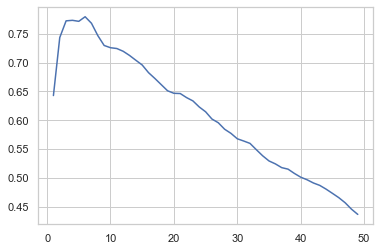

In [55]:
plt.plot(range(1,50),accuracy)

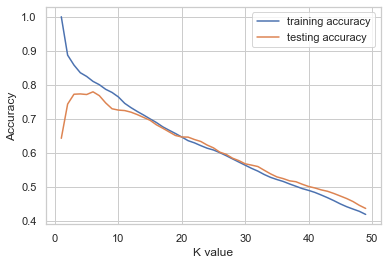

In [56]:
training_accuracy=[]
testing_accuracy=[]

neighbors = list(range(1,50))


for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train,y_train)
    training_accuracy.append(knn.score(x_train,y_train))
    testing_accuracy.append(knn.score(x_test,y_test))    

plt.plot(neighbors,training_accuracy,label='training accuracy')
plt.plot(neighbors,testing_accuracy,label='testing accuracy')
plt.ylabel("Accuracy")
plt.xlabel("K value")
plt.legend()

In [57]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsRegressor(n_neighbors=5)

scores = cross_val_score(knn,X,y,cv=10)

print (scores)
print (scores.mean())

print ("Mean Accuracy "+str(scores.mean()))

[0.53926205 0.63794373 0.63591033 0.6132531  0.70957694 0.65164386
 0.68751551 0.68529809 0.59948161 0.57247632]
0.6332361530807367
Mean Accuracy 0.6332361530807367


[0.5890862800332627, 0.6368412357716976, 0.6251761466175294, 0.635131905707175, 0.6332361530807367, 0.6240289491085217, 0.6146147414997081, 0.5932227642880721, 0.5790634878801005, 0.5654580681628537, 0.5539408488627677, 0.5502078592164259, 0.5435095390772633, 0.5371952374012771, 0.5213913830423494, 0.5108500900341703, 0.5000941004449586, 0.48975940807935625, 0.4856129507215143, 0.4746927772419194, 0.46610143580782876, 0.45696397411776524, 0.4449989935124198, 0.436538713158126, 0.4240497048372494, 0.4139526525889913, 0.406609075788854, 0.40160785078752215, 0.39513067306474814, 0.3909585186926251, 0.3824885396086105, 0.3791323790945146, 0.37193650066123923, 0.36629309819768263, 0.36070701438600195, 0.35530915992143586, 0.3490393727230455, 0.34224798499785924, 0.33827620924195567, 0.3332144266850137, 0.327320875525738, 0.3215561550409562, 0.31595712644398144, 0.31063489186640314, 0.3055315803108783, 0.3050221750332077, 0.3051704674402034, 0.30375369421732595, 0.30326175496278523]


Text(0, 0.5, 'scores')

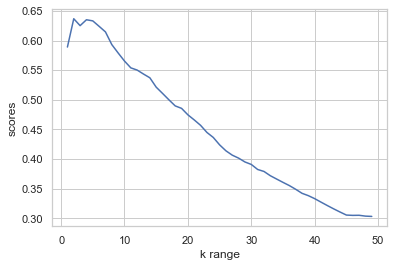

In [58]:
k_range = range(1,50)
k_scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=10)
    k_scores.append(scores.mean())
    
print (k_scores)


plt.plot(k_range,k_scores)
plt.xlabel("k range")
plt.ylabel("scores")

In [59]:
from sklearn.tree import DecisionTreeRegressor

In [60]:
tree_clf = DecisionTreeRegressor(max_depth=2,random_state=42)

In [61]:
tree_clf.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [62]:
tree_clf.score(X,y)

0.7059955999135619

In [63]:
accuracy=[]
for depth in range(1,50):
    dt = DecisionTreeRegressor(max_depth=depth,random_state=42)
    dt.fit(x_train,y_train)
    accuracy.append(dt.score(x_test,y_test))

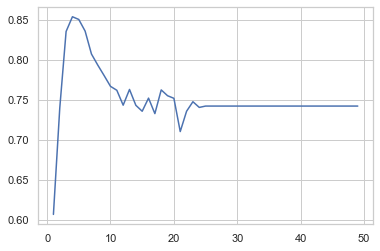

In [64]:
plt.plot(range(1,50),accuracy)

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rnd = RandomForestRegressor(max_depth=10)

In [67]:
rnd.fit(x_train,y_train)


C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [68]:
rnd.score(x_test,y_test)

0.8202226811358282

In [69]:
accuracy=[]
for depth in range(1,50):
    dt = RandomForestRegressor(max_depth=depth,random_state=42)
    dt.fit(x_train,y_train)
    accuracy.append(dt.score(x_test,y_test))

C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

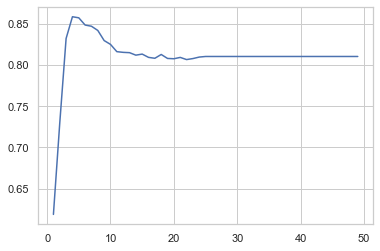

In [70]:
plt.plot(range(1,50),accuracy)

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

from mlxtend.regressor import StackingRegressor
lsvc=LinearSVR()
dtc=DecisionTreeRegressor()
knnc=KNeighborsRegressor()
svc=SVR()
gbc=GradientBoostingRegressor()
rfc=RandomForestRegressor()

In [72]:
stregr = StackingRegressor(regressors=[lsvc,dtc,knnc,svc,gbc,rfc], 
                           meta_regressor=lsvc)

In [73]:
stregr.fit(x_train, y_train)

C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.

StackingRegressor(meta_regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                           fit_intercept=True,
                                           intercept_scaling=1.0,
                                           loss='epsilon_insensitive',
                                           max_iter=1000, random_state=None,
                                           tol=0.0001, verbose=0),
                  refit=True,
                  regressors=[LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                        fit_intercept=True,
                                        intercept_scaling=1.0,
                                        loss='epsilon_insensitive',
                                        max_iter=1000, random_state=N...
                                                    criterion='mse',
                                                    max_depth=None,
                                                    max_features='auto',
       

In [74]:
prediction = stregr.predict(x_test)

In [75]:
stregr.score(x_test,y_test)

0.7466040508344054